[时间序列之`DateOffset`对象](https://mp.weixin.qq.com/s/ENz3NAPnd9mchtNoyJJZig)

# Period | PeriodIndex 频率
> 频率字符串表示的是 DateOffset 对象及其子类，可按指定的日历日时间段偏移日期时间。可用算数运算符（+）或 apply 方法执行日期偏移操作

In [24]:
import datetime
import numpy as np
import pandas as pd

friday = pd.Timestamp('2018-01-05')
friday.day_name()

'Friday'

In [6]:
# 与两个工作日相加（星期五 --> 星期二）

two_business_days = 2 * pd.offsets.BDay()
print(two_business_days)

two_business_days.apply(friday)

<2 * BusinessDays>


Timestamp('2018-01-09 00:00:00')

In [4]:
friday + two_business_days

Timestamp('2018-01-09 00:00:00')

In [5]:
(friday + two_business_days).day_name()

'Tuesday'

# rollforward() & rollback()
> 按偏移量把某一日期向前或向后移动至有效偏移日期。例如，工作日偏移滚动日期时会跳过周末（即，星期六与星期日），直接到星期一，因为工作日偏移针对的是工作日

In [7]:
ts = pd.Timestamp('2018-01-06 00:00:00')
ts.day_name()

'Saturday'

In [9]:
# 初始化工作起始和截止时间

offset = pd.offsets.BusinessHour(start='08:30', end='18:00')
offset

<BusinessHour: BH=08:30-18:00>

In [10]:
# 向前偏移到最近的工作日，即星期一

offset.rollforward(ts)

Timestamp('2018-01-08 08:30:00')

In [16]:
# 向后偏移到最近的工作日，即星期五

offset.rollback(ts)

Timestamp('2018-01-05 18:00:00')

# normalize() 可以把时间重置为午夜零点

In [17]:
ts = pd.Timestamp('2014-01-01 09:00')
ts

Timestamp('2014-01-01 09:00:00')

In [18]:
day = pd.offsets.Day()
day.apply(ts)

Timestamp('2014-01-02 09:00:00')

In [19]:
day.apply(ts).normalize()

Timestamp('2014-01-02 00:00:00')

In [20]:
hour = pd.offsets.Hour()
hour.apply(ts)

Timestamp('2014-01-01 10:00:00')

In [21]:
hour.apply(ts).normalize()

Timestamp('2014-01-01 00:00:00')

In [22]:
hour.apply(pd.Timestamp("2014-01-01 23:30"))

Timestamp('2014-01-02 00:30:00')

In [23]:
hour.apply(pd.Timestamp("2014-01-01 23:30")).normalize()

Timestamp('2014-01-02 00:00:00')

# 参数偏移

## Week 支持 weekday参数：生成日期始终位于一周中的指定日期

In [30]:
d = datetime.datetime(2008, 8, 18, 9, 0)
d

datetime.datetime(2008, 8, 18, 9, 0)

In [35]:
d.weekday()

0

In [26]:
d + pd.offsets.Week()

Timestamp('2008-08-25 09:00:00')

In [27]:
d + pd.offsets.Week(weekday=4)

Timestamp('2008-08-22 09:00:00')

In [37]:
(d + pd.offsets.Week(weekday=4)).weekday()

4

In [39]:
d - pd.offsets.Week(weekday=4)

Timestamp('2008-08-15 09:00:00')

In [40]:
(d - pd.offsets.Week(weekday=4)).weekday()

4

## YearEnd 支持 month 参数，用于指定月份

In [41]:
d + pd.offsets.YearEnd()

Timestamp('2008-12-31 09:00:00')

In [42]:
d + pd.offsets.YearEnd(month=10)

Timestamp('2008-10-31 09:00:00')

In [43]:
d + pd.offsets.YearBegin(month=3)

Timestamp('2009-03-01 09:00:00')

## 可以为`Series`和`DatetimeIndex`里的每个元素应用偏移

In [45]:
rng = pd.date_range(start='2012-01-01', end='2012-01-03')
rng

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03'], dtype='datetime64[ns]', freq='D')

In [46]:
rng + pd.DateOffset(months=2)

DatetimeIndex(['2012-03-01', '2012-03-02', '2012-03-03'], dtype='datetime64[ns]', freq='D')

In [48]:
rng + pd.DateOffset(days=10)

DatetimeIndex(['2012-01-11', '2012-01-12', '2012-01-13'], dtype='datetime64[ns]', freq='D')

In [49]:
s = pd.Series(rng)
s

0   2012-01-01
1   2012-01-02
2   2012-01-03
dtype: datetime64[ns]

In [50]:
s + pd.DateOffset(years=3)

0   2015-01-01
1   2015-01-02
2   2015-01-03
dtype: datetime64[ns]

In [52]:
s - pd.DateOffset(years=3)

0   2009-01-01
1   2009-01-02
2   2009-01-03
dtype: datetime64[ns]

## Timedelat 偏移
> 只支持 Day、Hour、Minute、Second、Micro、Milli、Nano

In [54]:
s - pd.offsets.Day(2)

0   2011-12-30
1   2011-12-31
2   2012-01-01
dtype: datetime64[ns]

In [55]:
td = s - pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
td

0   3 days
1   3 days
2   3 days
dtype: timedelta64[ns]

td + pd.offsets.Minute(15)

## 偏移量别名

> 时间序列频率的字符串别名在这里叫`偏移量别名`

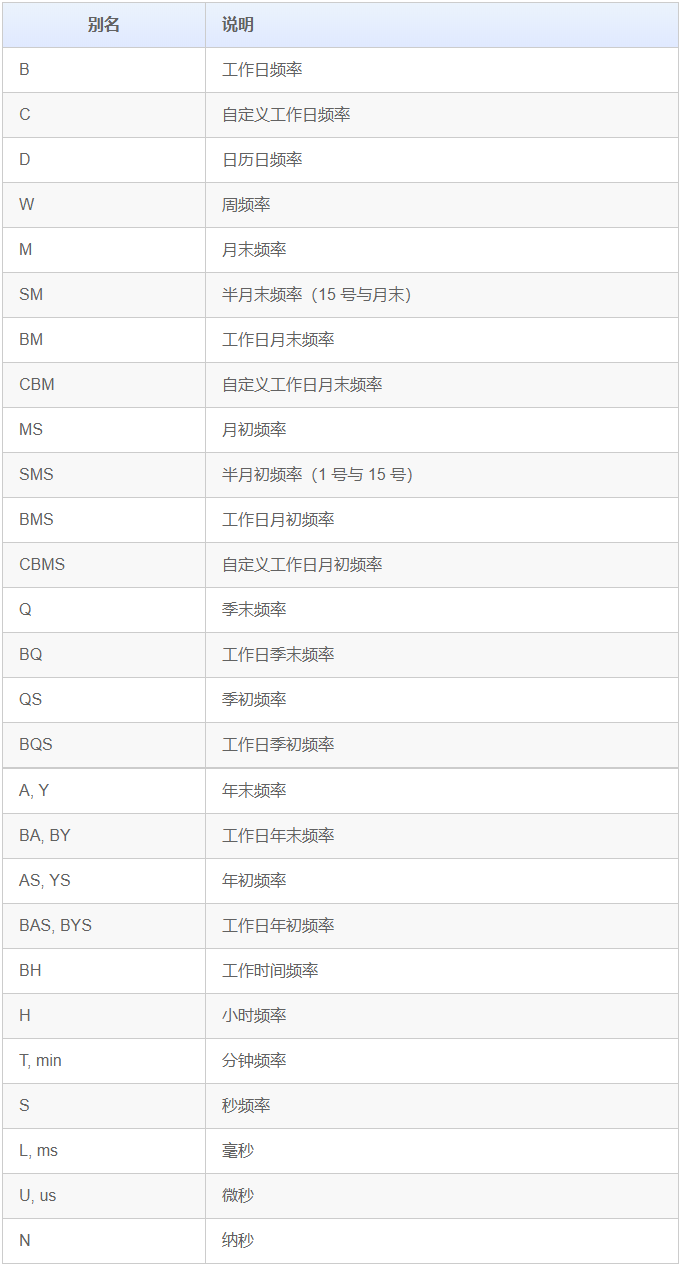

> `别名`与`偏移量实例`在绝大多数函数里可以互换

In [57]:
# 使用别名

pd.date_range(start='2011-01-01', periods=5, freq='B')

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07'],
              dtype='datetime64[ns]', freq='B')

In [58]:
# 使用偏移量实例

pd.date_range(start='2011-01-01', periods=5, freq=pd.offsets.BDay())

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07'],
              dtype='datetime64[ns]', freq='B')

> 组合`日`与`当日偏移量`

In [59]:
pd.date_range(start='2011-01-01', periods=10, freq='2h20min')

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 02:20:00',
               '2011-01-01 04:40:00', '2011-01-01 07:00:00',
               '2011-01-01 09:20:00', '2011-01-01 11:40:00',
               '2011-01-01 14:00:00', '2011-01-01 16:20:00',
               '2011-01-01 18:40:00', '2011-01-01 21:00:00'],
              dtype='datetime64[ns]', freq='140T')

In [60]:
pd.date_range(start='2011-01-01', periods=10, freq='1D10U')

DatetimeIndex([       '2011-01-01 00:00:00', '2011-01-02 00:00:00.000010',
               '2011-01-03 00:00:00.000020', '2011-01-04 00:00:00.000030',
               '2011-01-05 00:00:00.000040', '2011-01-06 00:00:00.000050',
               '2011-01-07 00:00:00.000060', '2011-01-08 00:00:00.000070',
               '2011-01-09 00:00:00.000080', '2011-01-10 00:00:00.000090'],
              dtype='datetime64[ns]', freq='86400000010U')